# Delitos ocurridos en el Municipio de Bucaramanga


El siguiente análisis será de utilidad para la Secretaría de Seguridad del Municipio de Bucaramanga y las comisarías de cada barrio, como también para las autoridades de urgencias del Sector de Salud del Municipio.



### **Contexto Comercial**

La Secretaría de Seguridad del Municipio de Bucamaranga, necesita analizar según los datos obtenidos en los delítos de su localidad, cuales barrios son los mas peligrosos y que objetos, armas/medios se utilizan con mayor frecuencia. Esto le permitirá tomar medidas preventivas en los barrios mas vulnerables y tratar con estos objetos utilizados en los delitos.

Nos provee datos con información sobre delitos ocurridos entre el año 2015-2021.

A su vez, necesita saber cuantos delitos culminan en lesiones fatales y lesiones no fatales. Esto afectaría a otras áreas en cuanto a presupuesto y planificiación, aparte de a la Secretaría de Seguridad.


### **Definición del objetivo**

También tiene la impresión que en el Barrio "Centro" los delitos se han incrementado en estos años, y necesita saber si esto es correcto y en que mes del año ocurren con más frecuencia".

### **Problema comercial**

Para poder tomar intervención correctamente y poder evaluar programas de seguridad que impliquen acciones preventivas necesita saber que personas son más vulnerables ante hechos delictivos  (si son jovenes, adultos, mayores, infantes) y en qué meses ocurren con más frecuencia.

### **Contexto Analítico**

Los datos recibidos poseen información de los delitos ocurridos, que contienen barrios, fechas, armas utilizadas, tipo de lesiones, información de las victimas, y móvil utilizado entre otros. Los cuales se detallan a continuación:

* ORDEN : número de delito
* ARMAS_MEDIOS : armas/objeto utilizado
* BARRIOS_HECHO : lugar del hecho
* LATITUD : código latitudinal
* LONGITUD : código longitudinal
* ZONA : descripción zonal
* NOM_COMUNA : identificación de comuna
* ANO : año del hecho
* MES : mes del hecho
* DIA : día del hecho
* DIA_SEMANA : día y la semana del hecho
* DESCRIPCION_CONDUCTA : descripción legal del hecho sucedido
* CONDUCTA : conclución del hecho sucedido
* CLASIFICACIONES DELITO : conclución final del daño realizado
* EDAD : edad del usuario
* CURSO_DE_VIDA : descripción de edad del usuario
* ESTADO_CIVIL_PERSONA : estado civil del usuario
* GENERO : género de la victima
* MOVIL_AGRESOR : descripción de movilidad del agresor
* MOVIL_VICTIMA : descripción de movilidad de la víctima



**Se analizará lo siguiente:**

* ¿Qué barrios tienen más delitos?
* ¿Cuáles son las armas medios que más se utilizan para cometer delitos?
* ¿Qué tipo de clasificación del delito prevalece?
* ¿Han crecido los delitos en el barrio Centro a través de los años?
* ¿En que etapa de curso de vida son más frecuentes las lesiones fatales?
* ¿Hay alguna relación que refiera al curso de vida de las victimas?

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_excel("dltosbucaramanga.xlsx")
df.head()

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,50946,ARMA BLANCA / CORTOPUNZANTE,KENNEDY,7.153943,-73.136794,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 103. HOMICIDIO,HOMICIDIO,Lesiones fatales,28,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
1,50947,ARMA BLANCA / CORTOPUNZANTE,CABECERA DEL LLANO,7.116619,-73.109865,URBANA,12. Cabecera del Llano,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,40,05. Adultez,SOLTERO,MASCULINO,A PIE,A PIE
2,50948,ARMA BLANCA / CORTOPUNZANTE,VILLA MARIA,7.154916,-73.130231,URBANA,02. Nor Oriental,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,50949,ARMA BLANCA / CORTOPUNZANTE,VILLAS DE SAN IGNACIO,7.156274,-73.142024,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,37,05. Adultez,UNION LIBRE,FEMENINO,A PIE,A PIE
4,50950,ARMA BLANCA / CORTOPUNZANTE,GAITAN,7.130512,-73.131001,URBANA,04. Occidental,2015,Enero,1,04. Jueves,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE


In [7]:
df.shape # posee 76099 filas y 20 columnas

(76099, 20)

In [8]:
df.columns

Index(['ORDEN', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'LATITUD', 'LONGITUD', 'ZONA',
       'NOM_COMUNA', 'ANO', 'MES', 'DIA', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA',
       'CONDUCTA', 'CLASIFICACIONES DELITO', 'EDAD', 'CURSO_DE_VIDA',
       'ESTADO_CIVIL_PERSONA', 'GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76099 entries, 0 to 76098
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ORDEN                   76099 non-null  int64  
 1   ARMAS_MEDIOS            76099 non-null  object 
 2   BARRIOS_HECHO           76099 non-null  object 
 3   LATITUD                 76099 non-null  float64
 4   LONGITUD                76099 non-null  float64
 5   ZONA                    76099 non-null  object 
 6   NOM_COMUNA              76099 non-null  object 
 7   ANO                     76099 non-null  int64  
 8   MES                     76099 non-null  object 
 9   DIA                     76099 non-null  int64  
 10  DIA_SEMANA              76099 non-null  object 
 11  DESCRIPCION_CONDUCTA    76099 non-null  object 
 12  CONDUCTA                76099 non-null  object 
 13  CLASIFICACIONES DELITO  76099 non-null  object 
 14  EDAD                    76099 non-null

In [10]:
df.describe

<bound method NDFrame.describe of         ORDEN                 ARMAS_MEDIOS          BARRIOS_HECHO   LATITUD  \
0       50946  ARMA BLANCA / CORTOPUNZANTE                KENNEDY  7.153943   
1       50947  ARMA BLANCA / CORTOPUNZANTE     CABECERA DEL LLANO  7.116619   
2       50948  ARMA BLANCA / CORTOPUNZANTE            VILLA MARIA  7.154916   
3       50949  ARMA BLANCA / CORTOPUNZANTE  VILLAS DE SAN IGNACIO  7.156274   
4       50950  ARMA BLANCA / CORTOPUNZANTE                 GAITAN  7.130512   
...       ...                          ...                    ...       ...   
76094  132883          SIN EMPLEO DE ARMAS          SAN FRANCISCO  7.130358   
76095  132884              ARMA TRAUMATICA              COLORADOS  7.178838   
76096  132885                 CONTUNDENTES                 CENTRO  7.120212   
76097  132886                 CONTUNDENTES                 CENTRO  7.120212   
76098  132887          SIN EMPLEO DE ARMAS  CHORRERAS DE DON JUAN  7.175989   

        LONGITUD 

In [11]:
df.isnull()

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76094,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76095,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76096,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76097,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

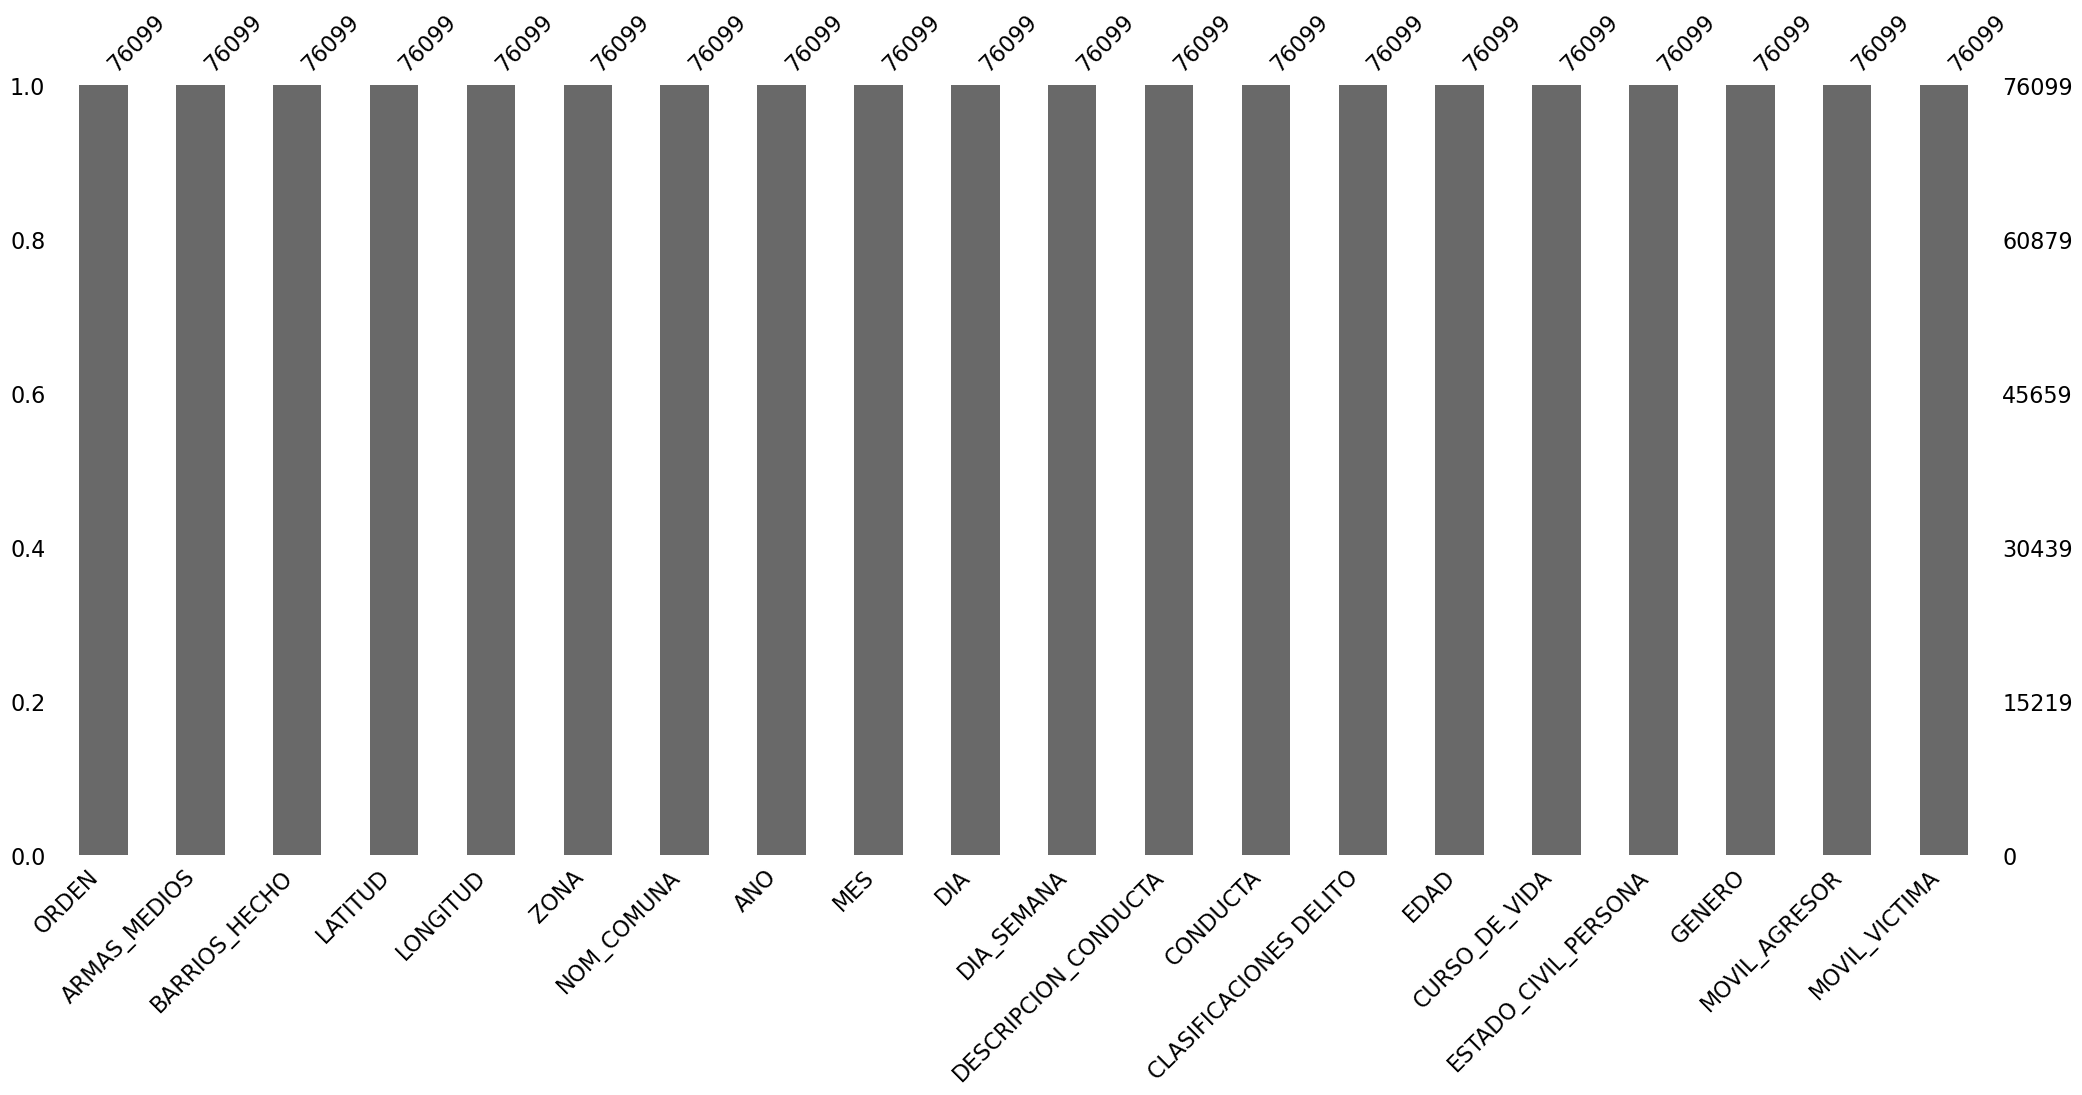

In [12]:
msno.bar(df) #no se encuentran nulos

In [13]:
df2=df.drop_duplicates()
print(df2.shape) # no se encuentran duplicados

(76099, 20)


In [14]:
df=df.drop(columns=["LATITUD","LONGITUD","ORDEN"]) #elimino estas columnas ya que no me aportarán datos

In [15]:
df['ANO'] = pd.to_datetime(df['ANO'], format='%Y')

df['ANO'] = df['ANO'].dt.year
#se convierte la columna ANO a datatime

# **1) ¿Qué barrios tienen más delitos?**

### Se realiza un conteo de hechos por barrio para ver cuales tienen más delitos

In [16]:
barrios_count = df['BARRIOS_HECHO'].value_counts()
print(barrios_count)


CENTRO                               6536
CABECERA DEL LLANO                   3642
SAN FRANCISCO                        3316
LA CONCORDIA                         2909
SAN ALONSO                           1928
                                     ... 
LA ROSITA                               1
MESETAS DEL SANTUARIO                   1
BELLAVISTA FLORIDA                      1
VRDA  SAN ISIDRO                        1
FACULTAD DE MINAS U. NACIONAL C-7       1
Name: BARRIOS_HECHO, Length: 454, dtype: int64


## Top 10 de barrios con más delitos 

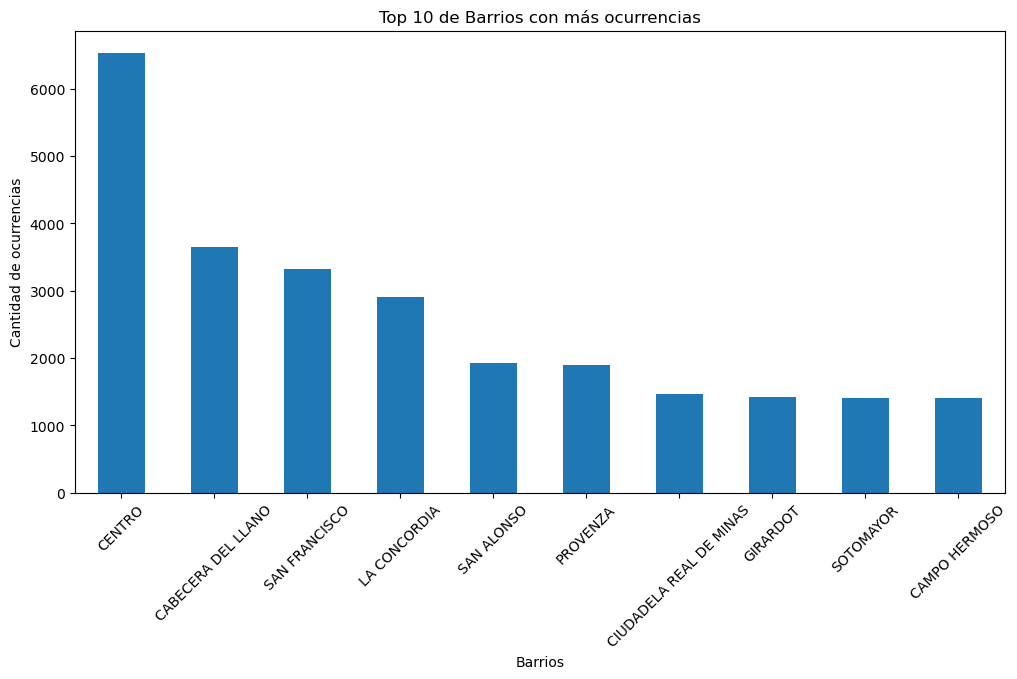

In [28]:
top_10_barrios = barrios_count.head(10)
# Mediante un conteo, se pudo analizar que el "CENTRO" es el lugar con mas delitos notificados.
# se utilizo solo el top 10, ya que son muchos barrios a calcular.

plt.figure(figsize=(12, 6))
top_10_barrios.plot(kind='bar')

plt.xlabel('Barrios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Barrios con más ocurrencias')
plt.xticks(rotation=45)

plt.show()

# **2) ¿Cuales son las armas/medios mas utilizadas en los delitos?**

### Se realiza un conteo de armas y medios utilizados para cometer los delitos

In [19]:
armas_count = df['ARMAS_MEDIOS'].value_counts()
print(armas_count)

SIN EMPLEO DE ARMAS                   25648
CONTUNDENTES                          18013
ARMA BLANCA / CORTOPUNZANTE           13898
VEHICULO                               5726
ARMA DE FUEGO                          5201
MOTO                                   3711
LLAVE MAESTRA                          1605
PALANCAS                                971
NO REPORTADO                            508
ESCOPOLAMINA                            243
LLAMADA TELEFONICA                      151
PERRO                                    62
REDES SOCIALES                           50
DIRECTA                                  40
PUNZANTES                                36
ACIDO                                    32
CORTANTES                                26
BICICLETA                                22
ARMA TRAUMATICA                          17
MIXTA                                    13
MEDICAMENTOS                             12
GASES                                    12
COMBUSTIBLE                     

## Se realiza un top 10 de armas medios

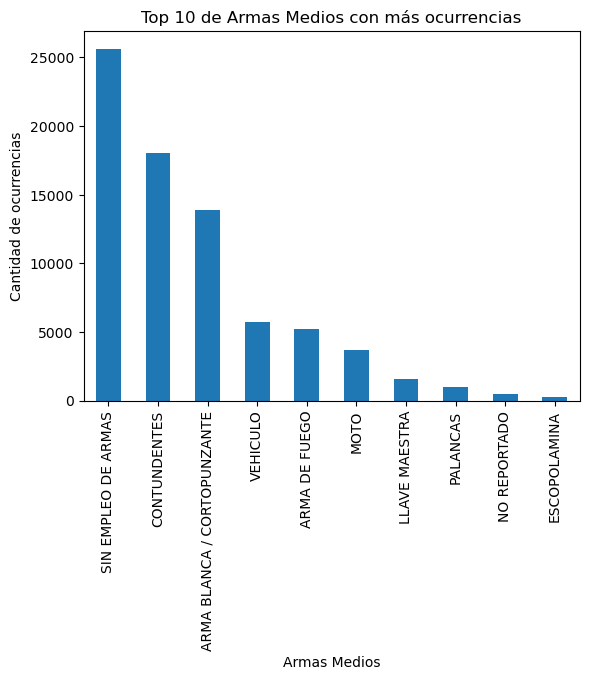

In [27]:
top_10_armas_medios = armas_count.head(10)
# Mediante un conteo, se pudo analizar que el arma/medios mas utilizado es "SIN EMPLEO DE ARMAS"
# se utilizo solo un top 10, para mostrar las armas/medios mas importantes.
top_10_armas_medios.plot(kind='bar')
plt.xlabel('Armas Medios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Armas Medios con más ocurrencias')
plt.xticks(rotation=90)

plt.show()

## Groupby de  Barrios y Armas/medios

In [21]:
df.groupby('BARRIOS_HECHO')[['ARMAS_MEDIOS']].sum()

,ARMAS_MEDIOS
BARRIOS_HECHO,
12 DE OCTUBRE,CONTUNDENTESARMA BLANCA / CORTOPUNZANTECONTUND...
13 DE JUNIO,MOTOMOTOARMA BLANCA / CORTOPUNZANTEVEHICULOSIN...
20 DE JULIO,CONTUNDENTESARMA DE FUEGOARMA BLANCA / CORTOPU...
23 DE JUNIO,CONTUNDENTESCONTUNDENTESARMA BLANCA / CORTOPUN...
5 DE ENERO,CONTUNDENTESARMA BLANCA / CORTOPUNZANTEARMA BL...
...,...
centro,SIN EMPLEO DE ARMASMOTOCONTUNDENTESCONTUNDENTE...
chapinero,SIN EMPLEO DE ARMAS
la victoria,CONTUNDENTES


## Se grafican juntos los top 10 de armas/medios y Barrios

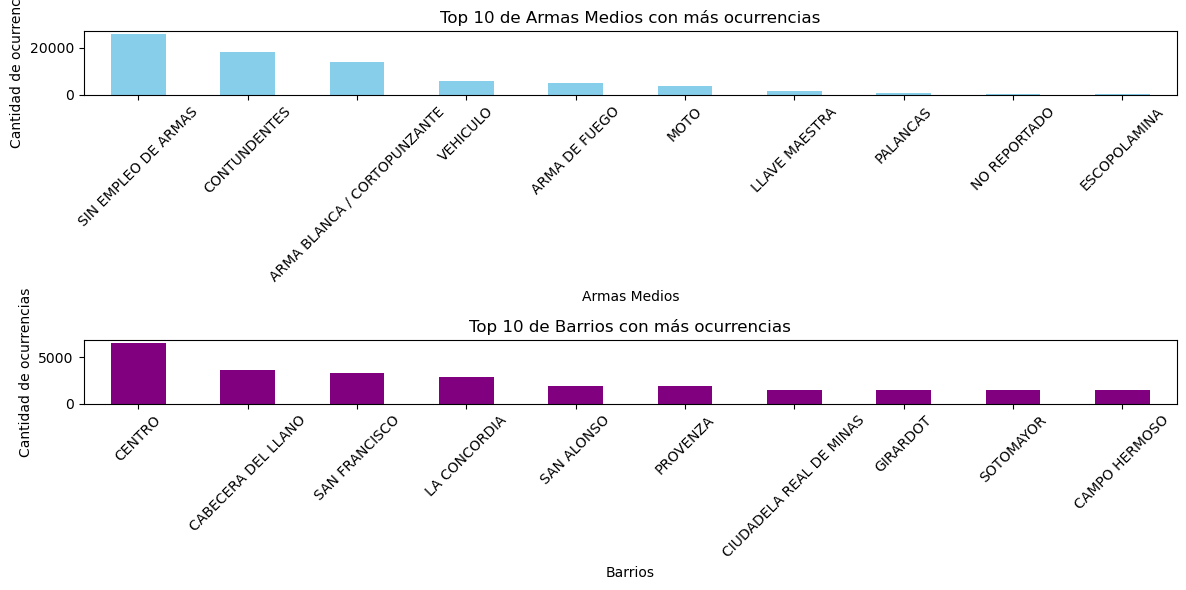

In [22]:
top_10_armas_medios = armas_count.head(10)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
top_10_armas_medios.plot(kind='bar', color='skyblue')
plt.xlabel('Armas Medios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Armas Medios con más ocurrencias')
plt.xticks(rotation=45)

top_10_barrios = barrios_count.head(10)

plt.subplot(2, 1, 2)
top_10_barrios.plot(kind='bar', color='purple')
plt.xlabel('Barrios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Barrios con más ocurrencias')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

## Top 3 de armas/medios utilizadas por top 3 de barrios con más delitos

In [23]:
conteo_armas = df['ARMAS_MEDIOS'].value_counts()
conteo_barrios = df['BARRIOS_HECHO'].value_counts()
top_armas = conteo_armas.nlargest(3).index
top_barrios = conteo_barrios.nlargest(3).index
df_filtrado = df[(df['ARMAS_MEDIOS'].isin(top_armas)) & (df['BARRIOS_HECHO'].isin(top_barrios))]
grupo = df_filtrado.groupby(['ARMAS_MEDIOS', 'BARRIOS_HECHO']).size().unstack(fill_value=0)

print(grupo)

BARRIOS_HECHO                CABECERA DEL LLANO  CENTRO  SAN FRANCISCO
ARMAS_MEDIOS                                                          
ARMA BLANCA / CORTOPUNZANTE                 575    1022            531
CONTUNDENTES                                605    1082            621
SIN EMPLEO DE ARMAS                        1793    3413           1194


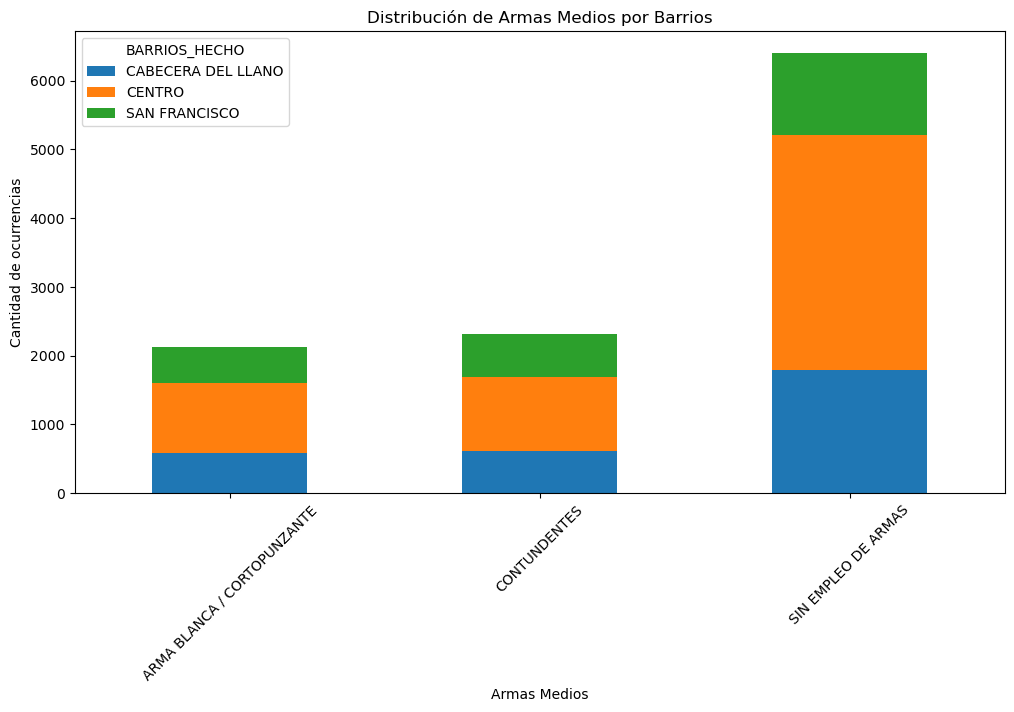

In [26]:
grupo.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Armas Medios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Distribución de Armas Medios por Barrios')
plt.xticks(rotation=45)

plt.show()

# Se realizó un top 3 con la mayor cantidad de armas/objetos utilizados en los barrios mas afectado
# mediante este resultado, obtuvimos un grafico combinado que indica de forma sencilla la cantidad
# de delitos por barrio con su objeto cometido. Como resultado se obtuvo que la mayoria de los delitos
# se realizo sin empleo de armas en el barrio "Centro".

# **3) ¿Qué tipo de clasificación del delito prevalece?**

### Se realiza un conteo de "clasificaciones delito"

In [29]:
lesiones_count = df['CLASIFICACIONES DELITO'].value_counts()
print(lesiones_count)

Lesiones no fatales    75154
Lesiones fatales         945
Name: CLASIFICACIONES DELITO, dtype: int64


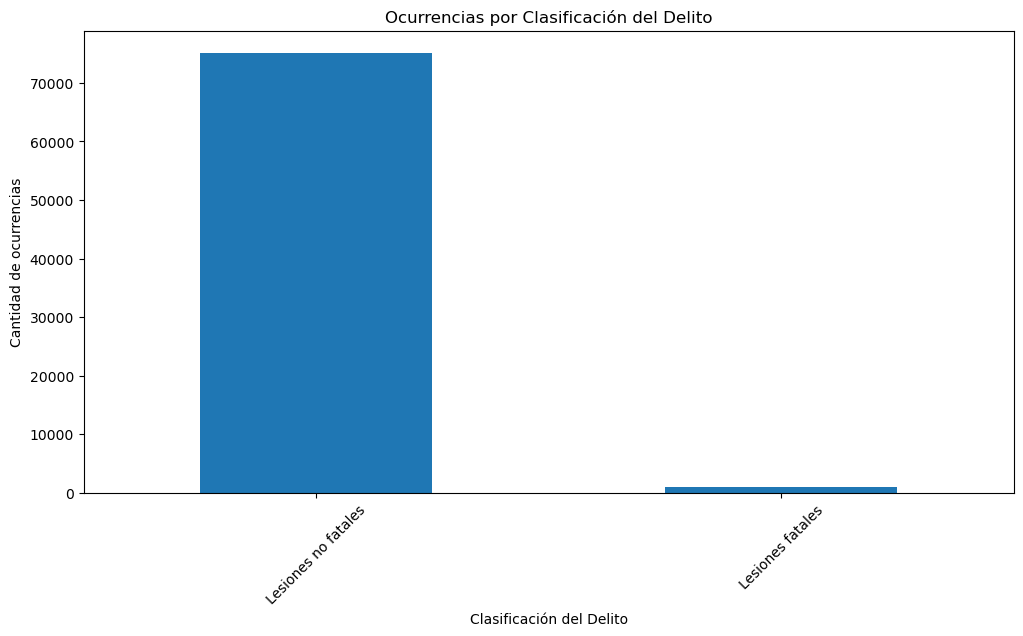

In [30]:
plt.figure(figsize=(12, 6))
lesiones_count.plot(kind='bar')
plt.xlabel('Clasificación del Delito')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Ocurrencias por Clasificación del Delito')
plt.xticks(rotation=45)

plt.show()


# **4) ¿Han crecido los delitos en el barrio Centro a través de los años?**

### Se utilizarán las variables "ANO" y "BARRIOS_HECHO" filtrando solamente el barrio "CENTRO" para verificar si se han incrementado los delitos en el mismo

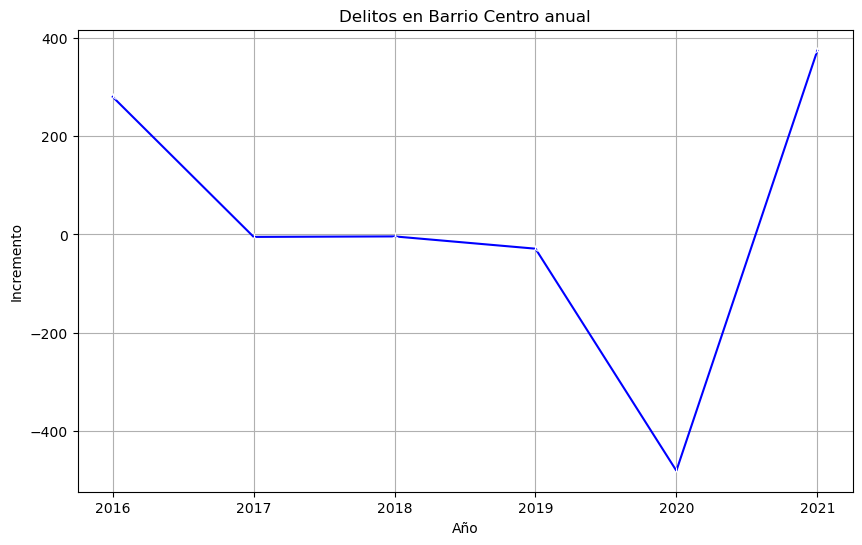

In [32]:
df_centro = df[df['BARRIOS_HECHO'] == 'CENTRO']
df_centro = df_centro.groupby('ANO').size().reset_index(name='Conteo')
df_centro['Incremento'] = df_centro['Conteo'].diff()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_centro, x='ANO', y='Incremento', marker='2', color='blue')
plt.title('Delitos en Barrio Centro anual')
plt.xlabel('Año')
plt.ylabel('Incremento')
plt.grid(True)

plt.show()


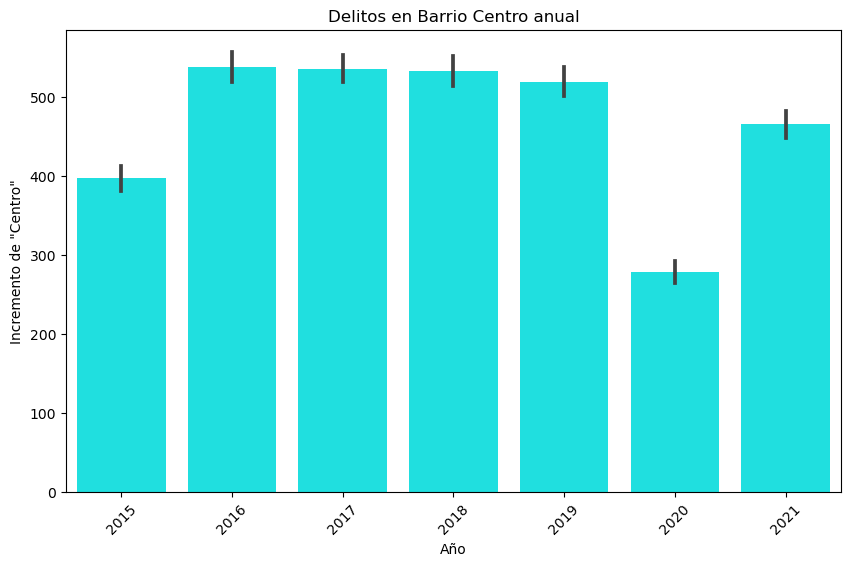

In [33]:
df_centro = df[df['BARRIOS_HECHO'] == 'CENTRO']

df_centro = df_centro.sort_values(by='ANO')
df_centro['Incremento'] = df_centro.groupby('ANO').cumcount()
plt.figure(figsize=(10, 6))
sns.barplot(x='ANO', y='Incremento', data=df_centro, color='cyan')
plt.title('Delitos en Barrio Centro anual')
plt.xlabel('Año')
plt.ylabel('Incremento de "Centro"')
plt.xticks(rotation=45)
plt.show()

### Se verifican los delitos en Barrio "CENTRO" para ver en que mes son más frecuentes

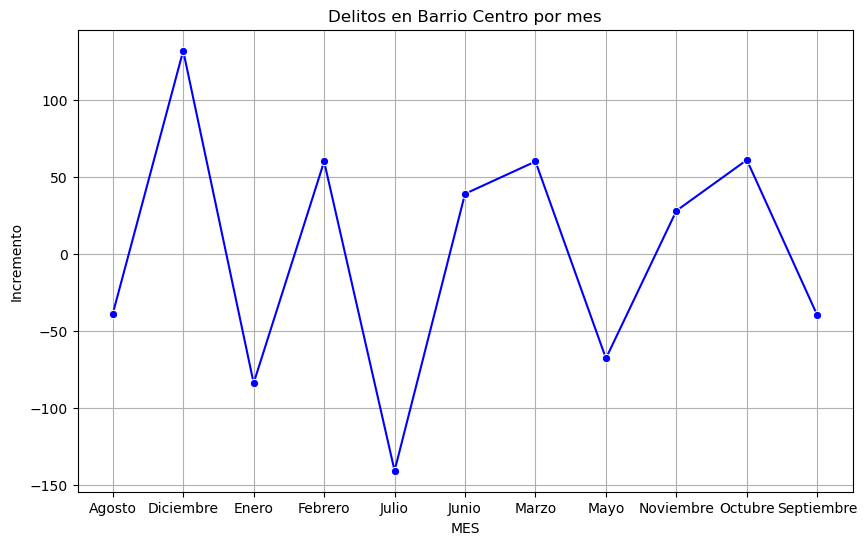

In [34]:
df_centro = df[df['BARRIOS_HECHO'] == 'CENTRO']
df_centro = df_centro.groupby('MES').size().reset_index(name='Conteo')
df_centro['Incremento'] = df_centro['Conteo'].diff()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_centro, x='MES', y='Incremento', marker='o', color='blue')
plt.title('Delitos en Barrio Centro por mes')
plt.xlabel('MES')
plt.ylabel('Incremento')
plt.grid(True)

plt.show()

# **5) ¿En que etapa de curso de vida son más frecuentes las lesiones fatales?**

### Se realiza un grafico lineplot utizando "Lesiones fatales" de la variable "CLASIFICACIONES DELITO" por la variable "CURSO_DE_VIDA"

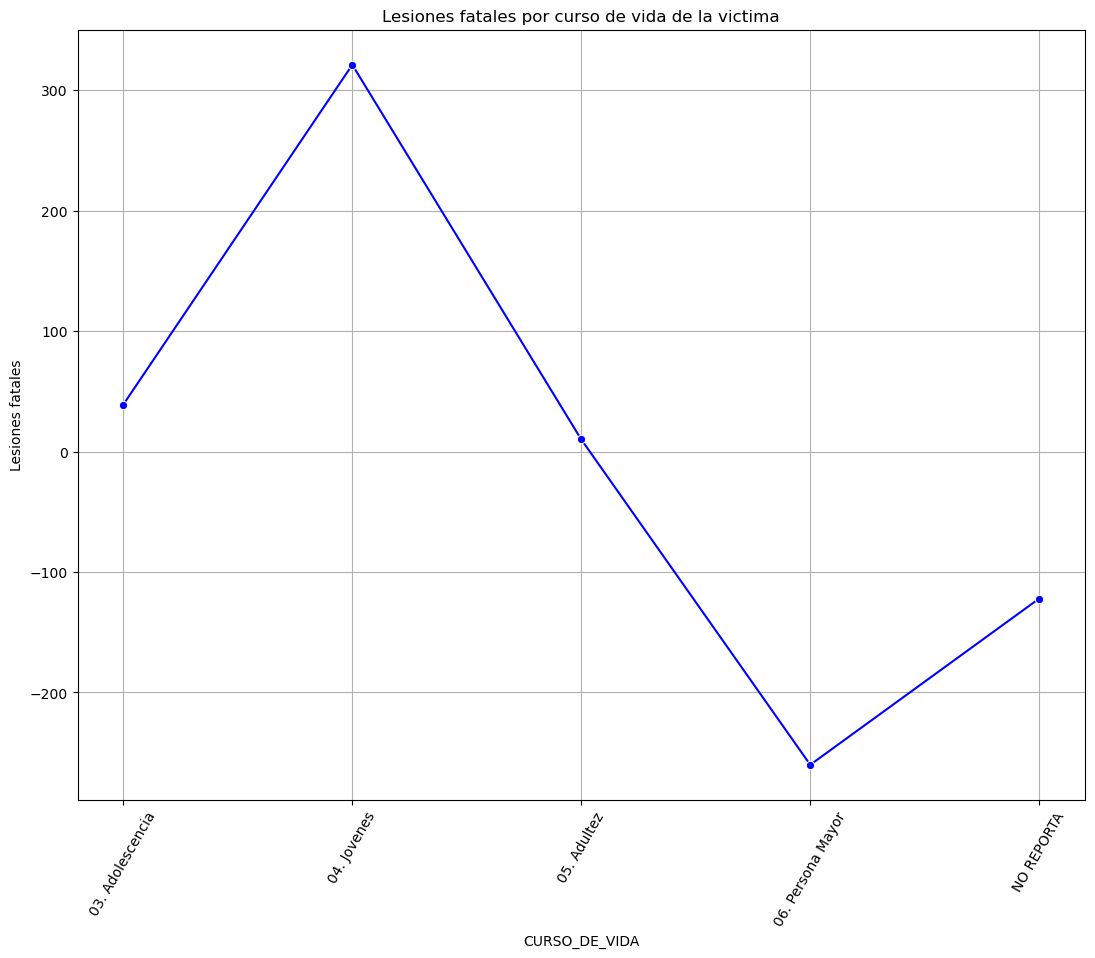

In [36]:
lesfatales = df[df['CLASIFICACIONES DELITO'] == 'Lesiones fatales']
lesfatales = lesfatales.groupby('CURSO_DE_VIDA').size().reset_index(name='Conteo')
lesfatales['lesfatal'] = lesfatales['Conteo'].diff()
plt.figure(figsize=(13, 10))
sns.lineplot(data=lesfatales, x='CURSO_DE_VIDA', y='lesfatal', marker='o', color='blue')
plt.title('Lesiones fatales por curso de vida de la victima')
plt.xlabel('CURSO_DE_VIDA')
plt.ylabel('Lesiones fatales')
plt.xticks(rotation=60)
plt.grid(True)

plt.show()

# **6) ¿Hay alguna relación que refiera al curso de vida de las victimas?**

### Se realiza una matriz de correlación para averiguar una relación entre variables

In [37]:
df2 = df.copy()

In [41]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label_encoder = LabelEncoder()
#transformo variables categóricas en numéricas

In [43]:
df2['ARMAS_MEDIOS'] = label_encoder.fit_transform(df2['ARMAS_MEDIOS'])
df2['BARRIOS_HECHO'] = label_encoder.fit_transform(df2['BARRIOS_HECHO'])
df2['ZONA'] = label_encoder.fit_transform(df2['ZONA'])
df2['NOM_COMUNA'] = label_encoder.fit_transform(df2['NOM_COMUNA'])
df2['BARRIOS_HECHO'] = label_encoder.fit_transform(df2['BARRIOS_HECHO'])
df2['MES'] = label_encoder.fit_transform(df2['MES'])
df2['DIA_SEMANA'] = label_encoder.fit_transform(df2['DIA_SEMANA'])
df2['DESCRIPCION_CONDUCTA'] = label_encoder.fit_transform(df2['DESCRIPCION_CONDUCTA'])
df2['CONDUCTA'] = label_encoder.fit_transform(df2['CONDUCTA'])
df2['NOM_COMUNA'] = label_encoder.fit_transform(df2['NOM_COMUNA'])
df2['CLASIFICACIONES DELITO'] = label_encoder.fit_transform(df2['CLASIFICACIONES DELITO'])
df2['CURSO_DE_VIDA'] = label_encoder.fit_transform(df2['CURSO_DE_VIDA'])
df2['ESTADO_CIVIL_PERSONA'] = label_encoder.fit_transform(df2['ESTADO_CIVIL_PERSONA'])
df2['GENERO'] = label_encoder.fit_transform(df2['GENERO'])
df2['MOVIL_AGRESOR'] = label_encoder.fit_transform(df2['MOVIL_AGRESOR'])
df2['MOVIL_VICTIMA'] = label_encoder.fit_transform(df2['MOVIL_VICTIMA'])

In [44]:
df2. head()

,ARMAS_MEDIOS,BARRIOS_HECHO,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,3,172,2,0,2015,3,1,3,1,2,0,28,3,5,1,0,0
1,3,55,2,11,2015,3,1,3,4,16,1,40,4,4,1,0,0
2,3,431,2,1,2015,3,1,3,4,16,1,18,3,4,1,0,0
3,3,441,2,0,2015,3,1,3,4,16,1,37,4,5,0,0,0
4,3,134,2,3,2015,3,1,3,15,9,1,18,3,4,1,0,0


### Realizo una  matriz de correlación que muestra cómo las variables se correlacionan entre sí.

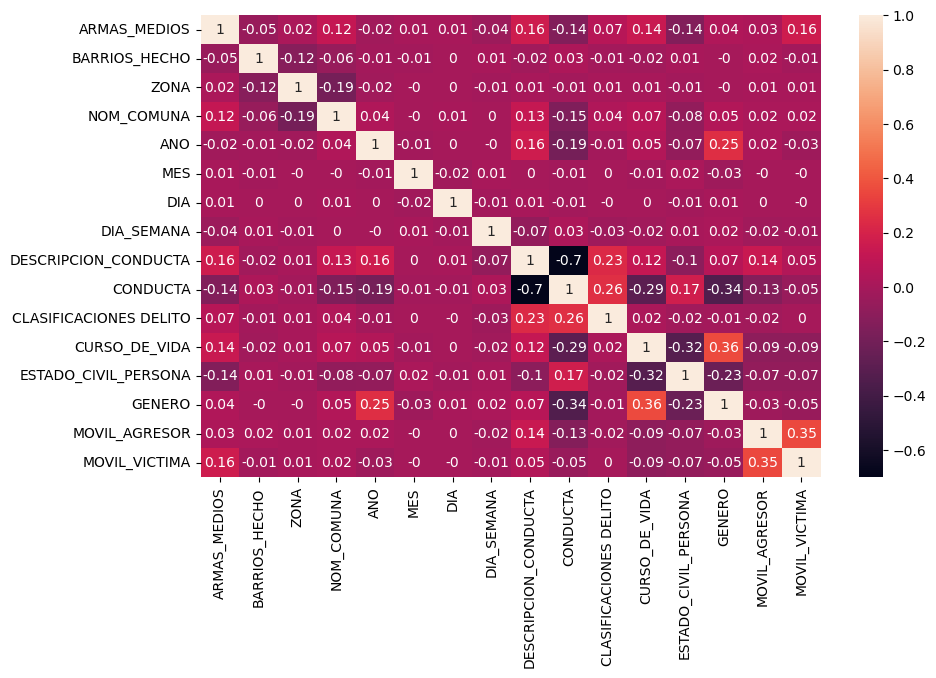

In [46]:
correlation_matrix = df2.corr(numeric_only=True).round(2)
correlation_matrix

plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Text(0, 0.5, 'CURSO DE VIDA')

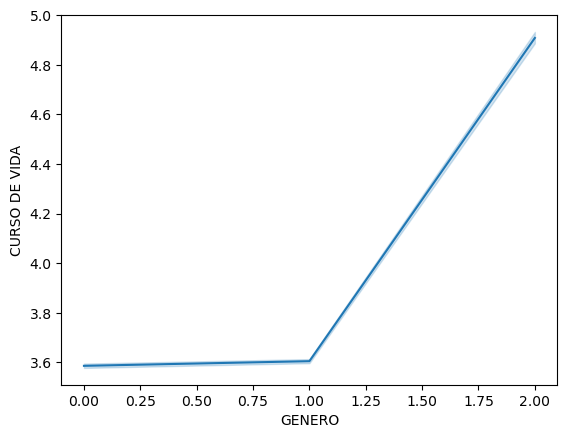

In [47]:
may_flights = df2
sns.lineplot(data=df2, x="GENERO", y="CURSO_DE_VIDA")
plt.xlabel('GENERO')
plt.ylabel('CURSO DE VIDA')

## Insights y Recomendaciones
**Mediante el análisis realizado se pudo observar lo siguiente:**

-Los barrios con más delitos son Centro,Cabecera del LLano y San Francisco.

-La mayoría de los delitos son sin empleo de armas, contundentes y arma blanca/ corto punzantes.

-Se observa que en el Top 3 de barrios con más delitos la mayoría se cometieron sin empleo de armas.

-La mayoría de los delitos culminan en lesiones no fatales.

-Se verificó que en el año 2020 en el curso de la cuarentena por la pandemia por Covid 19, los hechos cayeron, y se incrementaron abruptamente en el año 2021 en el Barrio Centro, cuando entre los años 2016/2019 se mantenenían practicamente sus valores, y el más bajo (exceptuando el 2020) fue en el año 2015.

-De los hechos delictivos en el barrio Centro los más frecuentes ocurren en el mes de diciembre.

-En cuanto a las lesiones fatales, efectivamente están relacionadas al curso de vida de la victima, los jovenes son los que más lesiones fatales sufren en los hechos.

-Se observa que los delincuentes tienden a elegir victimas mujeres dependiendo del curso de vida de la victima.

### Recomendaciones:
-Se recomendaría extremar las meddas de seguridad no solamente en el barrio "Centro", sino también en "Cabecera del LLano" y "San Francisco".

-Concientizar a los jóvenes y sobre todo mujeres a extremar medidas de seguridad.

-Aumentar vigilancia y patrullaje en el mes de diciembre.

-Como la mayoría de lesiones sin empleo de armas, contundentes y con armas blancas, se recomienda a las autoridades de salud poseer la capacidad hospitalaria para cubrir estas necesidades, no solo por lesiones de armas, sino también con apoyo psicológico.

-Capacitar al personal de seguridad para combatir diversos delitos sin armas, objetos contudentes, y corto/punzantes.